# Quick Draw Dataset for Diffusion

This notebook loads the numpy bitmap files from the Google Quickdraw Dataset and prepares it into a labelled 5 class huggingface dataset with 1000 samples from each class.

In [ ]:
%pip install -qq -U diffusers datasets transformers accelerate ftfy pyarrow==9.0.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.1/873.1 kB 17.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.7/374.7 kB 26.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 M

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import argparse
from pathlib import Path
import glob

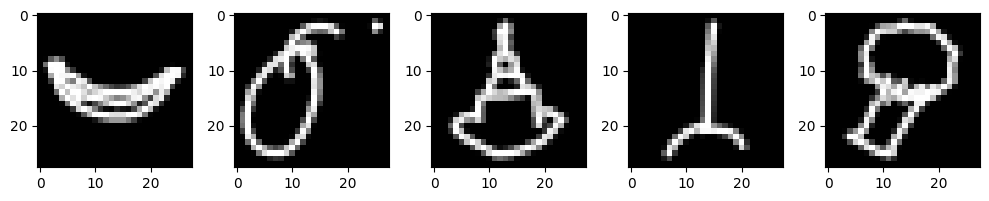

In [ ]:

file_paths = ["/content/full-numpy_bitmap-banana.npy", "/content/full-numpy_bitmap-apple.npy", "/content/full-numpy_bitmap-birthday cake.npy", "/content/full-numpy_bitmap-broom.npy", "/content/full-numpy_bitmap-broccoli.npy"]

datas = []

for file_path in file_paths:
  images = np.load(file_path)
  datas.append(images)

plt.figure(figsize=(10, 10))
for i in range(5):
    ax = plt.subplot(1, 5, i + 1)
    plt.imshow(datas[i][0].reshape(28, 28), cmap='gray')

plt.tight_layout()
plt.show()

In [ ]:
data = 255 - np.concatenate((datas[0][:1000], datas[1][:1000], datas[2][:1000], datas[3][:1000], datas[4][:1000])).reshape(5000, 28, 28)

In [ ]:
labels = np.concatenate((np.zeros(1000), np.ones(1000), np.full(1000, 2), np.full(1000, 3), np.full(1000, 4)))

In [ ]:
data.shape

(5000, 28, 28)

In [ ]:
import torchvision
import torch
from datasets import Dataset, Features, Array2D, ClassLabel
from datasets import load_dataset
from torchvision import transforms
from PIL import Image


data_dict = {"image": [img for img in data], "label": [label for label in labels]}

features = Features({"image": Array2D(dtype="uint8", shape=(28, 28)), "label": ClassLabel(names=["banana","apple","bday_cake","broom","broccoli"])})

dataset = Dataset.from_dict(data_dict, features=features)

In [ ]:
dataset.save_to_disk("/content/quick_draw_dataset")

Saving the dataset (0/1 shards):   0%|          | 0/5000 [00:00<?, ? examples/s]

In [ ]:
!zip -r /content/quick_draw_dataset.zip /content/quick_draw_dataset

  adding: content/quick_draw_dataset/ (stored 0%)
  adding: content/quick_draw_dataset/state.json (deflated 38%)
  adding: content/quick_draw_dataset/data-00000-of-00001.arrow (deflated 68%)
  adding: content/quick_draw_dataset/dataset_info.json (deflated 53%)
